<a href="https://colab.research.google.com/github/Samadanisanam/hello-world/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error


In [ ]:
df=pd.read_excel('https://github.com/masterfloss/dataRealEstate/blob/main/Portugal.xlsx?raw=true')
df['price']=df["Value New"]/df["Number New"]

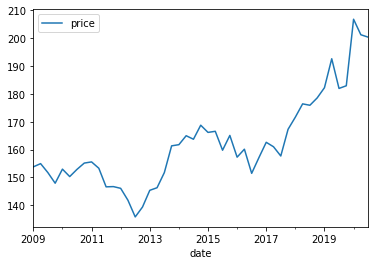

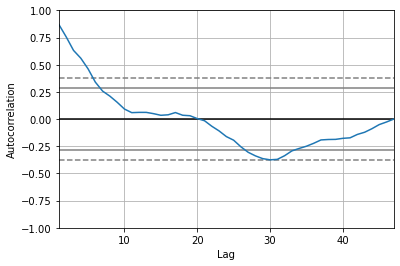

In [ ]:

serie=df[['price','date']]
serie1=serie.set_index('date')
serie1.plot()
pyplot.show()
autocorrelation_plot(serie1)
pyplot.show()

In [ ]:
serie1.index = pd.DatetimeIndex(serie1.index.values, freq=serie1.index.inferred_freq)

In [ ]:
# fit model
p = 4 # number of lags
d =1  #  degree of differencing.
q =0 # size of the moving average window

model = ARIMA(serie1, order=(p,d,q))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                   47
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -143.568
Date:                Sun, 28 Feb 2021   AIC                            297.136
Time:                        22:10:26   BIC                            306.279
Sample:                    03-31-2009   HQIC                           300.561
                         - 09-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2008      0.177     -1.135      0.256      -0.548       0.146
ar.L2         -0.0573      0.158     -0.362      0.718      -0.368       0.253
ar.L3          0.2427      0.197      1.232      0.2

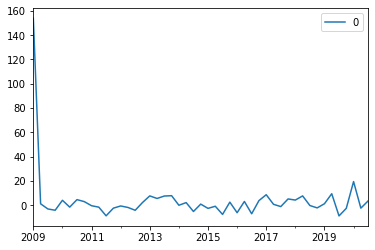

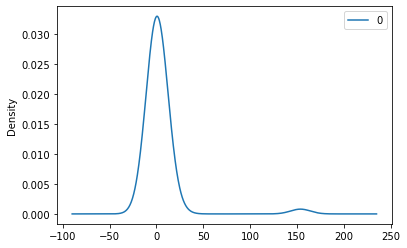

                0
count   47.000000
mean     4.142134
std     22.940254
min     -8.797137
25%     -2.412626
50%      0.753773
75%      4.144484
max    153.780351


In [ ]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=151.781667, expected=162.598906
predicted=164.777341, expected=161.002441
predicted=159.979375, expected=157.689137
predicted=158.852862, expected=167.271819
predicted=167.550702, expected=171.637598
predicted=171.277259, expected=176.407034
predicted=175.569707, expected=175.903843
predicted=179.702648, expected=178.543702
predicted=179.738638, expected=182.210485
predicted=184.025319, expected=192.610120
predicted=192.993593, expected=181.948200
predicted=184.873914, expected=182.908425
predicted=183.254122, expected=206.800860
predicted=206.699004, expected=201.230004
predicted=194.676632, expected=200.372706
Test RMSE: 8.463


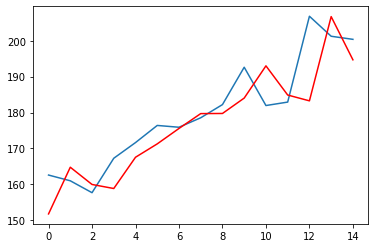

In [ ]:
# split into train and test sets
X = serie1.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()